# Support Vector Machine (SVM)
from sklearn.svm import SVC

#### SVC for Classification
from sklearn.svm import SVR
#### SVR for Regression

**As usual always refer sklean official documentation if you are not sure about syntax or parameter https://scikit-learn.org**

### Introduction
Support Vector Machine is a supervised Machine Learning algorithm widely used for solving different machine learning problems. Given a dataset, the algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.

#### Understanding the Mathematics involved
Let's take the example of the following dataset and see how can we divide the data into appropriate groups.
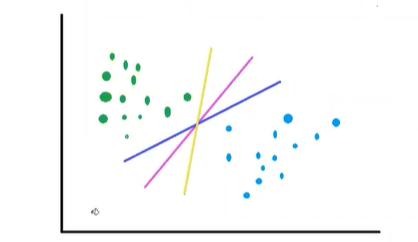
We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose? SVM solves this problem using the maximum margin as shown
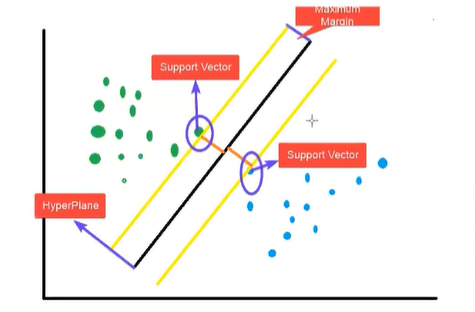

The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a hyperplane in terms of SVM. A Hyperplane is an n-1 dimensional plane which optimally divides the data of n dimensions. Here, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyperplane is a line here. The two points (highlighted with circles) which are on the yellow lines, they are called the support vectors. As it is a 2-D figure, they are points. In a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the algorithm creates the optimum classification line by maximising its distance from the two support vectors.

When the data is not linearly separable, then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMS more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods. Kernel methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without calculating the new coordinates in that higher dimension. It implicitly uses predefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points. This is called the kernel trick.
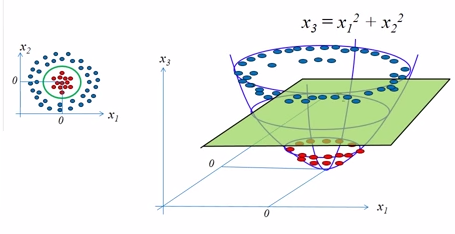
In the left diagram above, we have a non-linear distribution of data as we can not classify a data using a linear equation. To solve this problem, we can project the points in a 3-dimensional space and then derive a plane which divides the data into two parts. In theory, that's what a kernel function does without computing the additional coordinates for the higher dimension.

# Python Implementation

In [2]:
# Import necessory libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

import plotly

import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing data

df = pd.read_csv("breast cancer.csv", index_col = 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# print summary

print('Shape       ---------->', df.shape)
print('Each Column and data type and its count','\n')
print (df.info())

Shape       ----------> (569, 32)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 1

In [6]:
# Drop Alert 1 : Unnamed: 32 column has all nulls. safe to remove the column.

df = df.drop(['Unnamed: 32'], axis=1)

In [7]:
df.shape

(569, 31)

In [9]:
# Dataframe statistics

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Seems like no other columns has nulls. Its safe to process.**

**As we can see each feature data scaled differently. Lets go ahead and scale the data**

In [12]:
scaler = StandardScaler()
x = df.drop('diagnosis', axis=1)
x_scaled = scaler.fit_transform(x)

# Principal Component Analysis (PCA)

- PCA is dimension reduction technique (Not feature selection technique)
- PCA can be applied only on Features (Not on target)
- PCA can be applied when you have too many features and their correlation is not that significant with target.
- PCA will also takes care of multicollinearity problems

Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So, to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

# Step-by-Step Explanation of PCA
### STEP 1: STANDARDIZATION
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.
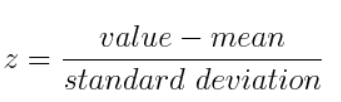
Once the standardization is done, all the variables will be transformed to the same scale.

### STEP 2: COVARIANCE MATRIX COMPUTATION
The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 matrix of this from:
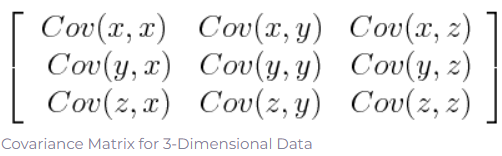
Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.

**What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?**

###### It’s actually the sign of the covariance that matters:

- If positive then: the two variables increase or decrease together (correlated)
- If negative then: one increases when the other decreases (Inversely correlated)
Now that we know that the covariance matrix is not more than a table that summarizes the correlations between all the possible pairs of variables, let’s move to the next step.

### STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS
Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data. Before getting to the explanation of these concepts, let’s first understand what do we mean by principal components.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.
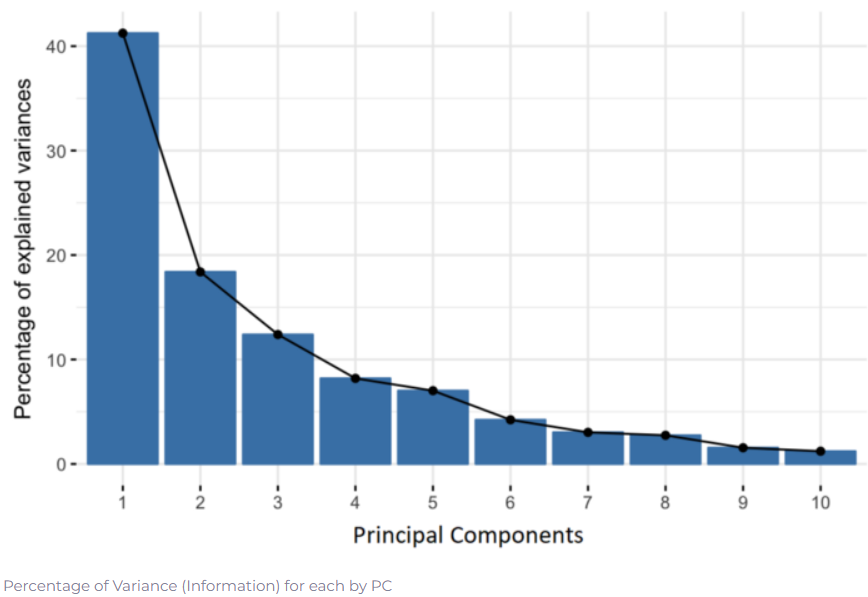
Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.

# How PCA Constructs the Principal Components
As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. For example, let’s assume that the scatter plot of our data set is as shown below, can we guess the first principal component ? Yes, it’s approximately the line that matches the purple marks because it goes through the origin and it’s the line in which the projection of the points (red dots) is the most spread out. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).

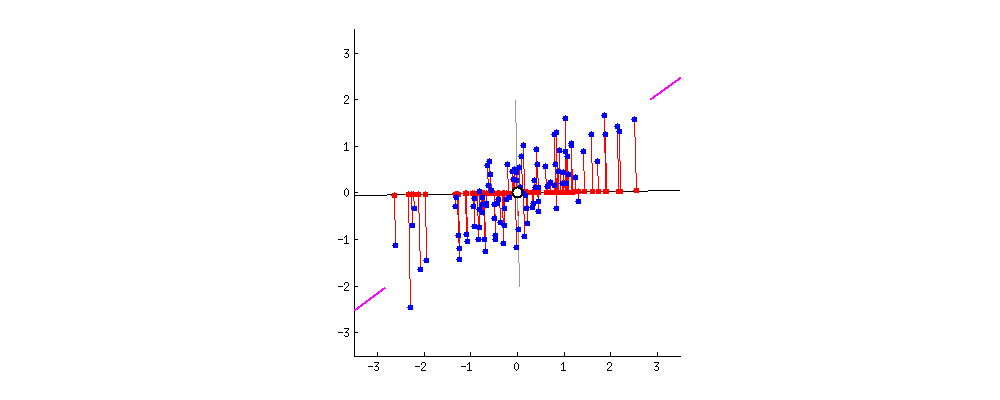

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

This continues until a total of p principal components have been calculated, equal to the original number of variables.

Now that we understand what we mean by principal components, let’s go back to eigenvectors and eigenvalues. What you first need to know about them is that they always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

Without further ado, it is eigenvectors and eigenvalues who are behind all the magic explained above, because the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

### STEP 4: FEATURE VECTOR
As we saw in the previous step, computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.

### LAST STEP: RECAST THE DATA ALONG THE PRINCIPAL COMPONENTS AXES
In the previous steps, apart from standardization, you do not make any changes on the data, you just select the principal components and form the feature vector, but the input data set remains always in terms of the original axes (i.e, in terms of the initial variables).

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.
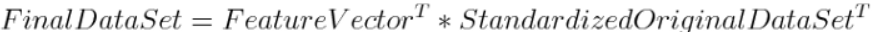

Source: https://builtin.com/

# Python Implementation

In [14]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

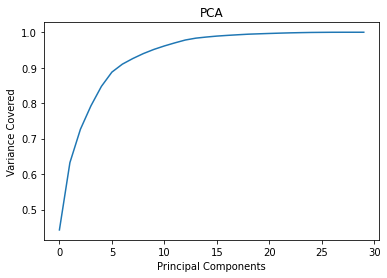

In [16]:
# Let's plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**Around 13 Principal Components are able to explain>95% variance. Its safe to consider starting 13 PC's**

In [18]:
pca = PCA(n_components=13)
new_pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262954,-0.859015,0.103396
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106996,0.813118,0.157921,-0.943530
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024065,0.454275,-0.605603,0.124388,-0.410631
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116974,-1.151514,1.011315,-0.933285
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377705,0.651360,-0.110516,0.387946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256988,-0.062650,0.123343,-0.051731
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244803,0.222752,-0.192643
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520876,-0.840511,0.096474,0.157428
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567937,0.223082,-0.280238,-0.542035,-0.089300,-0.178625,-0.697456,1.225216


In [19]:
# Replacing Label column (diagnosis) into binary codes

df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

y = df['diagnosis']

In [21]:
#Data split into train and test
x_train, x_test, y_train, y_test = train_test_split(princi_comp, y, test_size=0.25, random_state=355)

In [23]:
def print_score(clf, x_train,x_test,y_train,y_test, train= True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n====================Train Result==============")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n====================Test Result==============")
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        print ('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

In [27]:
from sklearn.svm import SVC
svc = SVC()

# svc Model training and printing train and test score

svc.fit(x_train,y_train)

# Call the function and pass dataset to check train and test score

print_score(svc,x_train,x_test,y_train,y_test,train=True)

print_score(svc,x_train,x_test,y_train,y_test,train=False)


====================Train Result==============
Accuracy Score: 98.12%

====================Test Result==============
Accuracy Score: 97.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# Similarly you can build other models and check the score

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()

# GBDT Model training and printing train and test score

gbdt.fit(x_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


====================Train Result==============
Accuracy Score: 100.00%

====================Test Result==============
Accuracy Score: 94.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        93
           1       0.94      0.90      0.92        50

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Random forest model training and printing train and test score
rf.fit(x_train,y_train)

# call the function and pass dataset to check train and test score

print_score(rf,x_train,x_test,y_train,y_test,train=True)
print_score(rf,x_train,x_test,y_train,y_test,train=False)


====================Train Result==============
Accuracy Score: 100.00%

====================Test Result==============
Accuracy Score: 94.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        93
           1       0.92      0.92      0.92        50

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



## Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
# C             = It is a hypermeter in SVM to control error. How much error we can allow. 
#               Low C means allowing Less number of error/s and
#               Large C means allowing more number of errors.
#gamma = Gamma decides that how much curvature we want in a decision boundary. Gamma high means more curvature
#        Gamma Low means Less curvature.

param_grid = { 'C' :[1,5,10,20],
              'gamma': [0.001, 0.01, 0.02,0.002] 
             }

In [35]:
gridsearch = GridSearchCV (svc, param_grid)
gridsearch.fit(x_train, y_train)

# best parms
gridsearch.best_params_

{'C': 5, 'gamma': 0.01}

In [36]:
# SVC Model Training and printing train and test score (past param update)
svc = SVC (C = 5, gamma = 0.01)
svc.fit(x_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(svc,x_train,x_test,y_train,y_test,train=True)

print_score(svc,x_train,x_test,y_train,y_test,train=False)


====================Train Result==============
Accuracy Score: 98.12%

====================Test Result==============
Accuracy Score: 97.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# Creating Pipeline

In real world the final model is build with pipeline. We work on all preprocessing steps, do EDA, make analysis etc. Once we find all the hyperparameter and feature selection techniques etc. We use the main techniques and create pipeline. This will be clean and better flow of data through series of sequences.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [38]:
df = pd.read_csv('breast cancer.CSV', index_col=0)

In [39]:
x = df.drop(['Unnamed: 32', 'diagnosis'], axis=1)

y = df.diagnosis

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=355)

In [41]:
pipe = Pipeline([('Scaler', StandardScaler()),  # fit_transform
                 ('PCA', PCA(n_components=13)), # fit_transform
                 ('SVM', SVC(C=7, gamma=0.01))]) # only_fit

In [42]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=7, gamma=0.01))])

In [43]:
y_pred = pipe.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.9790209790209791

# Key Points

- You need to know the execution sequence. (example - Imputation techniques should be applied before standard scaler and then PCA.
- You cannot use pipeline for plotting graphs and analysis.
- Analysis can be done before creating a pipeline.
- Do not use unnecessary methods in the Pipeline.

You can also use any encoding/Imputation techniques in the pipeline like,

- ('Simple Imputer', Simplelmputer(strategy='mean')), # fit_transform
- ('Ohe',OneHotEncoder(handle_unknown='ignore')), # fit_transform